# Feature Selection

In [2]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np  
import matplotlib.pyplot as plt   
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 


df = pd.read_csv('pe_ratio.csv', encoding='utf-8', index_col='date')
df.index = pd.to_datetime(df.index)

dfTrain = df.T

stock_id = dfTrain.index

sf = pd.Series(stock_id)

print('通過單根檢定的股票代號為：')
for k in sf :
    
    ts = df[k]
    result = adfuller(ts)

    if result[1] <= 0.1:
         print(k, end=' ')

通過單根檢定的股票代號為：
1215 1220 1229 1236 1256 1310 1323 1338 1339 1340 1474 1476 1503 1516 1521 1536 1537 1539 1541 1565 1593 1595 1597 1702 1704 1720 1721 1725 1752 1787 1815 2064 2066 2104 2115 2233 2235 2328 2356 2377 2379 2414 2427 2428 2430 2433 2439 2441 2450 2451 2453 2456 2459 2471 2485 2540 2608 2640 2701 2706 2732 2809 2812 2816 2891 2905 2910 2929 3003 3014 3017 3023 3029 3032 3044 3078 3217 3218 3285 3323 3388 3402 3413 3484 3548 3550 3556 3567 3611 3617 3652 4106 4133 4138 4401 4532 4535 4536 4549 4711 4735 4745 4905 4908 4947 4971 4974 4991 4999 5225 5269 5284 5288 5289 5305 5386 5426 5438 5474 5478 5534 5536 5609 5902 6138 6139 6153 6167 6170 6176 6199 6218 6229 6230 6237 6238 6245 6266 6282 6285 6292 6294 6411 6414 6415 6426 6452 6457 6504 6603 6609 6803 8016 8048 8049 8064 8076 8083 8105 8210 8213 8234 8255 8349 8416 8435 8437 8446 8908 9924 9925 9941 9942 9946 

# Regression & Graphing

In [3]:
dataset = pd.read_csv('pefeatures.csv', encoding='utf-8')

In [4]:
stock=input('請輸入透過單根檢定的股票代號:')

z=input('請輸入標準差:')

請輸入透過單根檢定的股票代號: 3323
請輸入標準差: 0.5


In [5]:
x = dataset['date'].values.reshape(-1, 1)
y = dataset[stock].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33333333333333, random_state=0)
print(y_train.shape)

(492, 1)


In [6]:
lm = LinearRegression()
lm.fit(X_train,y_train)
r_squared = lm.score(X_train, y_train)

In [7]:
y_pred = lm.predict(X_test)

std = y_pred - y_test
std =np.std(std)
Coefficient = float(z)
C = Coefficient
 

ypp = y_pred + C* std
ypm = y_pred - C* std

In [8]:
print('y=ax+b的 a係數:',lm.coef_)
print('y=ax+b的 b截距:',lm.intercept_ )
print('R平方：',r_squared)
print('標準差：',std)

y=ax+b的 a係數: [[0.00246339]]
y=ax+b的 b截距: [18.95431408]
R平方： 0.009011084203319197
標準差： 5.855581168400792


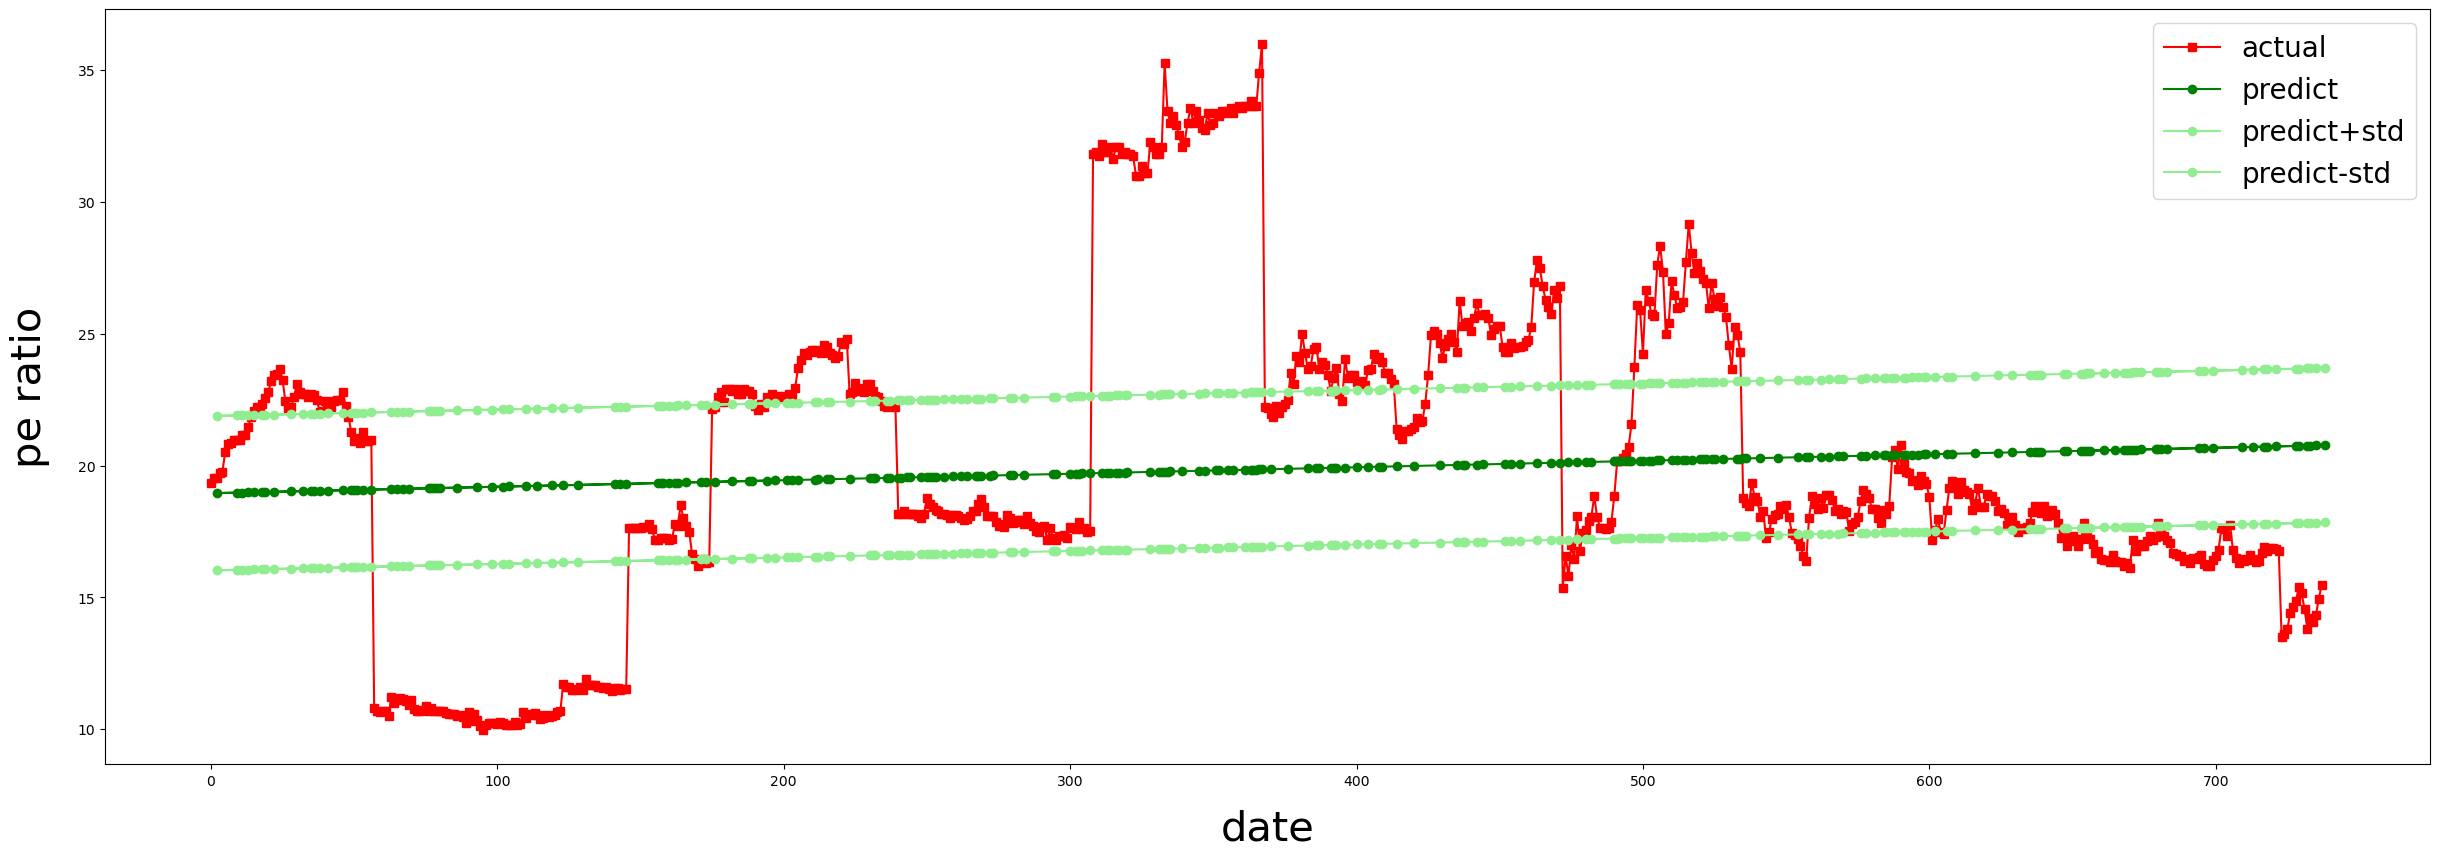

In [9]:
plt.figure(figsize=(30,10),dpi=100,linewidth = 2)
plt.plot(y,'s-',color = 'r', label="actual")
plt.plot(X_test,y_pred,'o-',color = 'g', label="predict")
plt.plot(X_test,ypp,'o-',color = 'lightgreen', label="predict+std")
plt.plot(X_test,ypm,'o-',color = 'lightgreen', label="predict-std")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("date", fontsize=30, labelpad = 15)
plt.ylabel("pe ratio", fontsize=30, labelpad = 20)
plt.legend(loc = "best", fontsize=20)
plt.show()

In [11]:
coef = lm.coef_
intercept = lm.intercept_
yp = coef*x + intercept
ypp = yp + C* std
ypm = yp - C* std

In [12]:
df = dataset.set_index('date')
df = df.loc[df.index.get_level_values('date') > 491]
datedf = df.index
datedf = pd.Series(datedf)

In [13]:
ave = []
profit=0
sum_profit=[]
n=1
count=0
null=[]
myList = []
for i in range(492,738,1):
    if y[i] > ypp [i] or y[i] < ypm[i]:
        myList.append(i)

for i in myList:
    if myList.count(i)==1:
        count=count+1
count=count-1

In [14]:
for i in range(1,int(count),1):
    
    if myList[i+1]-myList[i]==1 and myList[i]>491 :
        ave.append(y[myList[i]])
        
        
        

    elif  ave!=null and y[myList[i]+1]>np.mean(ave) and myList[i]>491:
        profit=(y[myList[i]+1]-np.mean(ave))/np.mean(ave)
        
        print('第',n,'次操作報酬率為: {:.2%}'.format(float(profit)))
        n=n+1
        sum_profit.append(profit)
        ave=[]
    elif  ave!=null and y[myList[i]+1]<np.mean(ave) and myList[i]>491 :
        profit=(np.mean(ave)-y[myList[i]+1])/np.mean(ave)
        
        print('第',n,'次操作報酬率為: {:.2%}'.format(float(profit)))
        n=n+1
        sum_profit.append(profit)
        ave=[]



#總損益
sum_profit=np.sum(sum_profit)
print('買賣總損益: {:.2%}'.format(sum_profit))

第 1 次操作報酬率為: 28.84%
第 2 次操作報酬率為: 5.80%
第 3 次操作報酬率為: 4.87%
第 4 次操作報酬率為: 3.69%
第 5 次操作報酬率為: 6.41%
買賣總損益: 49.60%
